In [1]:
import pandas as pd

def charts(r, flag):#对数据进行分析的函数
    r = r.drop(['Releases', 'Type'], axis = 1)#删除多余列
    
    top20 = pd.pivot_table(r[:20], index=['Artist', 'Title'], values=['#'])#前十专辑根据作者分类
    
    scoreY = pd.pivot_table(r, index=['Year'], values=['Rating'], aggfunc=['mean'])#每年作品平均评分
    
    numY = r['Year'].value_counts(sort = False).sort_index()#每年的上榜专辑数目，按年份排列
    
    def tops():#返回前十专辑信息透视表
        print('根据作者分类的前二十专辑')
        return top20
    def bestA():#返回作品最多的二十个作者表
        print('上榜最多的二十个作者')
        bestA = r['Artist'].value_counts()[:20]#上榜最多的作者
        print(bestA)
        return 0
    def year_score():#返回平均分透视表
        sYp = scoreY.plot().set_ylabel('avgScore')#平均评分线状图
        print('每年作品的平均分线状图表为：')
        print(sYp)
        return scoreY
    def year_num():#返回每年专辑上榜数目表
        print('每年作品的上榜数目柱状图表为：')
        nYp = numY.plot.bar();
        print(nYp)
        print('上榜最多的二十个年份为：')
        print(r['Year'].value_counts()[:20])
        return numY
    
    if flag=='tops':
        return tops()
    if flag=='year_score':
        return year_score()
    if flag=='year_num':
        return year_num()
    if flag=='bestA':
        return bestA()

In [2]:
def new_chart(fileName):
    r03 = pd.read_csv(fileName)
    Artist = pd.pivot_table(r03, index=['Artist', 'Title', '#'], values=['Rating'])#根据作者对表格分类
    Artist.to_csv('New_' + fileName)#生成基于作者的新csv表
    return 'New_' + fileName#返回新文件名

In [3]:
def crossE(r1, r2):
    #交叉对比，哪个作者不在了，哪个作者新进入
    Alist1 = r1.pivot_table(r1, index=['Artist']).index
    Alist2 = r2.pivot_table(r1, index=['Artist']).index
    #获取作者列表
    Aset1 = set(Alist1)
    Aset2 = set(Alist2)
    deleted = Aset1-Aset2#在新榜单中被排除的作者
    added = Aset2-Aset1#2020榜单中新增的作者
    both = Aset1 & Aset2
    print('在新榜单中被排除的作者有：', list(deleted), '数目为：', len(list(deleted)))
    print('-------------------')
    print('在新榜单中新增的作者有：', list(added), '数目为：', len(list(added)))
    print('-------------------')
    print('同时在两个榜单中的作者有：', list(both), '数目为：', len(list(both)))

In [4]:
def lookforA(r1, r2):
    Alist1 = r1.pivot_table(r1, index=['Artist']).index
    Alist2 = r2.pivot_table(r2, index=['Artist']).index
    #获取仅有艺人名字的list
    flag = input('输入0开始查找')
    while flag == '0':
        aNm = input('请输入艺人名字；若要结束查找，请输入-1')
        if aNm == '-1':
            return
        print(aNm,':')
        if aNm in Alist1:
            print('在2003的榜单上')
            wList = r1.query('Artist==@aNm')
            wList = wList.pivot_table(wList, index=['Title'])
            print(wList)
        else:
            print('不在2003的榜单上')
        if aNm in Alist2:
            print('在2020的榜单上')
            wList = r2.query('Artist==@aNm')
            wList = wList.pivot_table(wList, index=['Title'])
            print(wList)
        else:
            print('不在2020的榜单上')
    return

In [5]:
fn1 = 'RS2003'
fn2 = 'RS2020'
r03 = pd.read_csv(fn1)
r20 = pd.read_csv(fn2)

In [6]:
t20_03=charts(r03, 'tops')
print(t20_03)
print('------------------------------------------')
t20_20=charts(r20, 'tops')
print(t20_20)

根据作者分类的前二十专辑
                                                                      #
Artist                        Title                                    
Bob Dylan                     Blonde on Blonde                        9
                              Blood on the Tracks                    16
                              Highway 61 Revisited                    4
Bruce Springsteen             Born to Run                            18
Elvis Presley                 The Sun Sessions                       11
Marvin Gaye                   What’s Going On                         6
Michael Jackson               Thriller                               20
Miles Davis                   Kind of Blue                           12
Nirvana                       Nevermind                              17
The Beach Boys                Pet Sounds                              2
The Beatles                   Abbey Road                             14
                              Revolver             

In [7]:
bA03 = charts(r03, 'bestA')
bA20 = charts(r20, 'bestA')

上榜最多的二十个作者
The Beatles               11
The Rolling Stones        10
Various Artists            9
Bob Dylan                  9
Bruce Springsteen          8
The Who                    7
Elton John                 6
David Bowie                6
Led Zeppelin               5
U2                         5
Otis Redding               5
The Byrds                  5
Sly & the Family Stone     4
The Police                 4
Pink Floyd                 4
Stevie Wonder              4
James Brown                4
Talking Heads              4
The Smiths                 4
Roxy Music                 4
Name: Artist, dtype: int64
上榜最多的二十个作者
The Beatles           9
Bob Dylan             7
Kanye West            6
The Rolling Stones    6
David Bowie           5
Led Zeppelin          5
Bruce Springsteen     5
Various Artists       5
Aretha Franklin       4
Pink Floyd            4
Radiohead             4
Neil Young            4
The Who               4
Stevie Wonder         4
Joni Mitchell         4
Elvis Presl

每年作品的平均分线状图表为：
Text(0, 0.5, 'avgScore')
每年作品的平均分线状图表为：
Text(0, 0.5, 'avgScore')


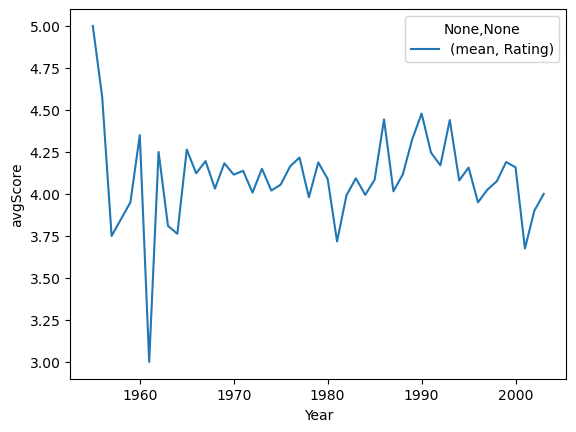

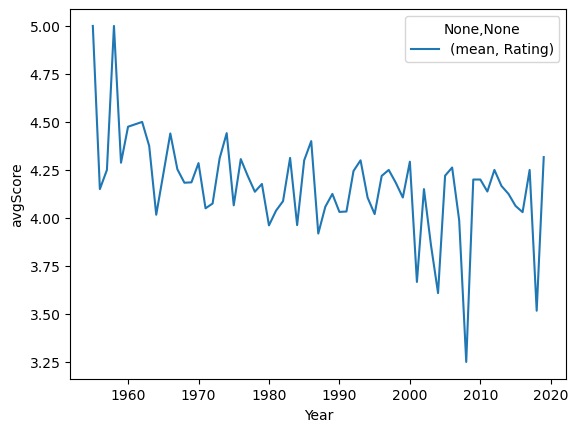

In [8]:
ySC03=charts(r03,'year_score')
ySC20=charts(r20,'year_score')

每年作品的上榜数目柱状图表为：
AxesSubplot(0.125,0.11;0.775x0.77)
上榜最多的二十个年份为：
1970    30
1973    25
1972    24
1969    23
1967    22
1968    21
1971    20
1975    19
1977    18
1978    17
1974    16
1994    16
1965    15
1987    14
1991    14
1979    13
1966    12
1976    11
1985    10
1980    10
Name: Year, dtype: int64


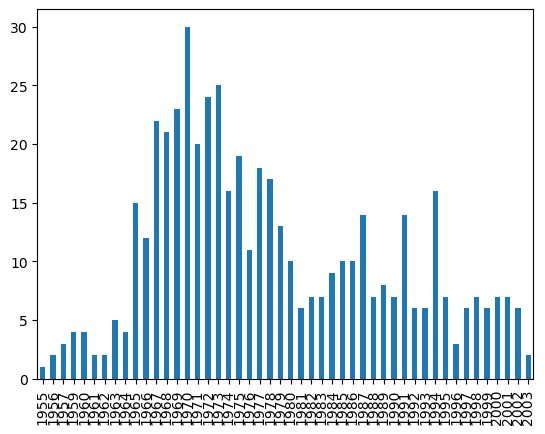

In [9]:
yNm03 = charts(r03, 'year_num')

每年作品的上榜数目柱状图表为：
AxesSubplot(0.125,0.11;0.775x0.77)
上榜最多的二十个年份为：
1970    25
1972    23
1971    21
1969    18
1975    17
1994    17
1967    17
1973    16
1977    15
1978    14
1991    14
1979    13
1968    13
1995    10
1965    10
1997    10
1980    10
1989    10
2003     9
1986     9
Name: Year, dtype: int64


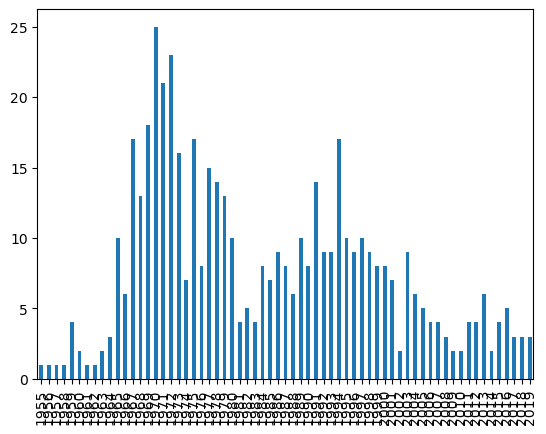

In [10]:
yNm20 = charts(r20, 'year_num')

In [11]:
fn1 = new_chart(fn1)
fn2 = new_chart(fn2)
r03 = pd.read_csv(fn1)
r20 = pd.read_csv(fn2)

In [12]:
crossE(r03, r20)

在新榜单中被排除的作者有： ['Simon & Garfunkel', 'ZZ Top', 'Don Henley', 'Little Walter', 'The Paul Butterfield Blues Band', 'John Mayall & the Bluesbreakers', 'The Grateful Dead', 'Cheap Trick', 'The Mama’s and the Papa’s', 'The Pogues', 'X', 'Jane’s Addiction', 'Robert Johnson', 'Captain Beefheart & His Magic Band', 'Bobby Bland', 'Moby', 'Professor Longhair', 'Jethro Tull', 'Carpenters', 'Def Leppard', 'Hank Williams', 'The Yardbirds', 'The Mothers of Invention', 'Steve Earle', 'The Smashing Pumpkins', 'Public Image Ltd.', 'Mott the Hoople', 'Moby Grape', 'Iggy and The Stooges', 'Meat Loaf', 'The Jesus and Mary Chain', 'Buffalo Springfield', 'Albert King', 'Eric Clapton', 'Curtis Mayfield & The Impressions', 'Eurythmics', 'Alice Cooper', 'Quicksilver Messenger Service', 'No Doubt', 'Soundgarden', 'John Lee Hooker', 'Gram Parsons', 'Jackson Browne', 'Buena Vista Social Club', 'Steve Miller Band', 'Echo and the Bunnymen', 'The Mamas & the Papas', 'Paul McCartney & Wings', 'LaBelle', 'The Crickets'

In [ ]:
lookforA(r03, r20)

输入0开始查找 0
请输入艺人名字；若要结束查找，请输入-1 2 Pac


2 Pac :
不在2003的榜单上
不在2020的榜单上


请输入艺人名字；若要结束查找，请输入-1 2Pac


2Pac :
不在2003的榜单上
在2020的榜单上
                  #  Rating
Title                      
All Eyez on Me  436     4.6


请输入艺人名字；若要结束查找，请输入-1 Kendrick Lamar


Kendrick Lamar :
不在2003的榜单上
在2020的榜单上
                          #  Rating
Title                              
DAMN.                   175    4.15
To Pimp a Butterfly      19    4.60
good kid, m.A.A.d city  115    4.35


请输入艺人名字；若要结束查找，请输入-1 Kanye West


Kanye West :
不在2003的榜单上
在2020的榜单上
                                     #  Rating
Title                                         
808s & Heartbreak                  244    3.50
Graduation                         204    3.70
Late Registration                  117    4.15
My Beautiful Dark Twisted Fantasy   17    4.20
The College Dropout                 74    4.20
Yeezus                             269    3.80


请输入艺人名字；若要结束查找，请输入-1 David Bowie


David Bowie :
在2003的榜单上
                                                      #  Rating
Title                                                          
Aladdin Sane                                        277    3.75
ChangesOneBowie                                     425    3.00
Hunky Dory                                          107    4.40
Low                                                 249    4.40
Station to Station                                  323    4.15
The Rise and Fall of Ziggy Stardust and the Spi...   35    4.55
在2020的榜单上
                                                      #  Rating
Title                                                          
Hunky Dory                                           88    4.40
Low                                                 206    4.40
Scary Monsters… and Super Creeps                    443    3.85
Station to Station                                   52    4.15
The Rise and Fall of Ziggy Stardust and the Spi...   40    4.55
